# Differences between 2013 and 2014

## Questions
1. How does the the SNR change between 2013 and 2014
1. How does the the absolute amplitude change between 2013 and 2014
1. Is there any pattern in change of SNR in relation to distance from GRT
1. Is there any pattern in change of absolute amplitude in relation to distance from GRT
1. Is there any pattern in change of SNR in relation to distance from pipeline
1. Is there any pattern in change of absolute amplitude in relation to distance from pipeline

## Answers
1. The SNR changes between those two years. The change ranges from almost none up to 7dB. It is also common that line was observed one year and not the other.
1. Most of the aboslute amplitude changes are negligible and rather do no exceed 5dB
1. No
1. No
1. No
1. No

In [1]:
import utm
import os

import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from obspy import UTCDateTime
from itertools import chain

In [2]:
processed_df_filepath_2013 = 'data/maps/2013.240-270/processed_dataframe.pickle'
processed_df_filepath_2014 = 'data/maps/2014.240-270/processed_dataframe.pickle'

In [3]:
df_2013 = pd.read_pickle(processed_df_filepath_2013)
df_2014 = pd.read_pickle(processed_df_filepath_2014)

In [13]:
# Merge those two DataFrames with inner join which in effect leaves only those stations that exist in both datasets
df_join = df_2013.loc[:,['id','observed', 'spectral_line_amp']].merge(
    right=df_2014.loc[:,['id','observed','dist','lon','lat', 'dist_nearest', 'spectral_line_amp']], how='inner',on='id', suffixes=('_2013','_2014'))

df_join = df_join.sort_values(by='dist', ascending=True)
df_join.loc[:,'dist_nearest'] = df_join.loc[:,'dist_nearest'].apply(lambda row: np.round(row,2))
df_join.loc[:,'id_short'] = df_join.loc[:,'id'].apply(lambda row: '.'.join(row.split('.')[:2]))

In [12]:
fig, (ax,ax1) = plt.subplots(figsize=(15,10), nrows=2)
fig.subplots_adjust(hspace=0.8)

df_join.sort_values(by='dist', ascending=True).plot.bar(x='dist', y=['observed_2013','observed_2014'], ax=ax) 

df_join.sort_values(by='dist_nearest', ascending=True).plot.bar(x='dist_nearest', y=['observed_2013','observed_2014'], ax=ax1)

dist_labels = []
for i, (iname, idist) in df_join.sort_values(by='dist', ascending=True).loc[:, ['id_short', 'dist']].iterrows():
    dist_labels.append('   '.join([str(iname), str(idist)]))
ax.set_xticklabels(dist_labels)

dist_nearest_labels = []
for i, (iname, idist) in df_join.sort_values(by='dist_nearest', ascending=True).loc[:, ['id_short', 'dist_nearest']].iterrows():
    dist_nearest_labels.append('   '.join([str(iname), str(idist)]))
ax1.set_xticklabels(dist_nearest_labels)

ax.set_xlabel('Distance to GRT (km)\n Station id')
ax1.set_xlabel('Distance to pipeline (km)\n Station id')

ax.set_ylabel('Amplitude of difference (dB)\n 0 if amplitude of line <STD of noise')
ax1.set_ylabel('Amplitude of difference (dB)\n 0 if amplitude of line <STD of noise')

ax.set_title('Comparison of SNR in 2013 and 2014 in relation to distance from GRT')
ax1.set_title('Comparison of SNR in 2013 and 2014 in relation to distance from North-South pipeline')

fig

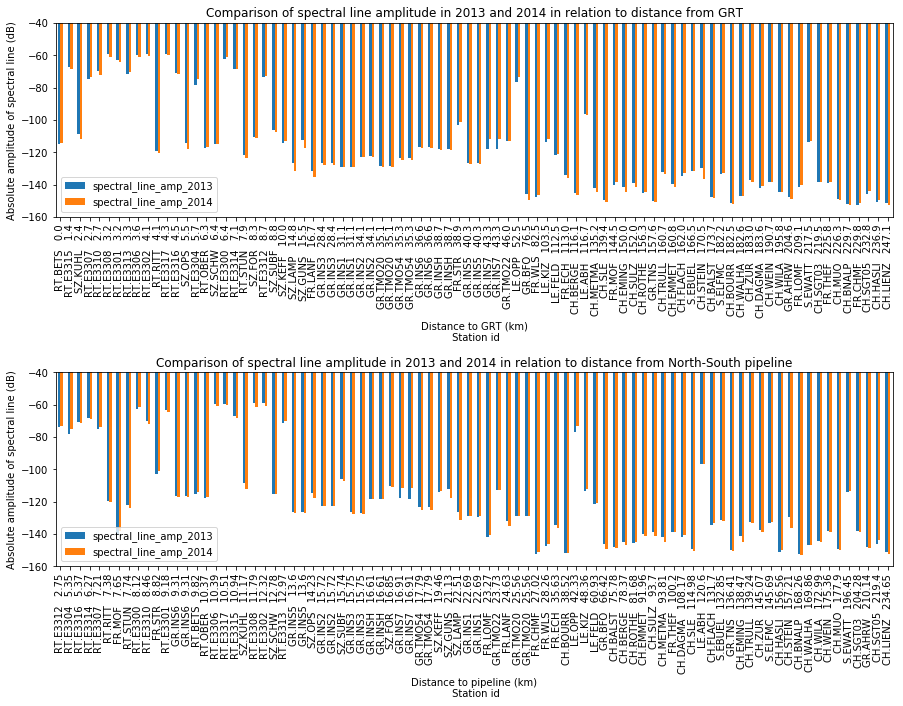

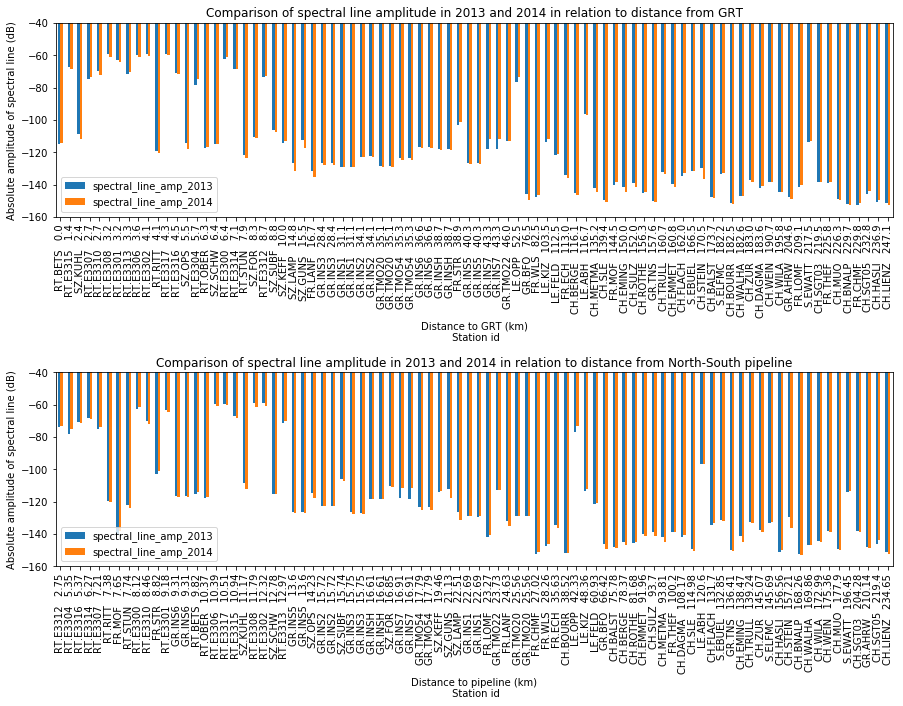

In [17]:
fig, (ax,ax1) = plt.subplots(figsize=(15,10), nrows=2)
fig.subplots_adjust(hspace=0.8)

df_join.sort_values(by='dist', ascending=True).plot.bar(x='dist', y=['spectral_line_amp_2013','spectral_line_amp_2014'], ax=ax) 

df_join.sort_values(by='dist_nearest', ascending=True).plot.bar(x='dist_nearest', y=['spectral_line_amp_2013','spectral_line_amp_2014'], ax=ax1)

dist_labels = []
for i, (iname, idist) in df_join.sort_values(by='dist', ascending=True).loc[:, ['id_short', 'dist']].iterrows():
    dist_labels.append('   '.join([str(iname), str(idist)]))
ax.set_xticklabels(dist_labels)

dist_nearest_labels = []
for i, (iname, idist) in df_join.sort_values(by='dist_nearest', ascending=True).loc[:, ['id_short', 'dist_nearest']].iterrows():
    dist_nearest_labels.append('   '.join([str(iname), str(idist)]))
ax1.set_xticklabels(dist_nearest_labels)

ax.set_xlabel('Distance to GRT (km)\n Station id')
ax1.set_xlabel('Distance to pipeline (km)\n Station id')

ax.set_ylabel('Absolute amplitude of spectral line (dB)')
ax1.set_ylabel('Absolute amplitude of spectral line (dB)')

ax.set_title('Comparison of spectral line amplitude in 2013 and 2014 in relation to distance from GRT')
ax1.set_title('Comparison of spectral line amplitude in 2013 and 2014 in relation to distance from North-South pipeline')

ax.set_ylim((-160,-40))
ax1.set_ylim((-160,-40))

fig

## Observations
1. The changes of absolute amplitude are negligible
1. Changes of SNR can be as high as 5dB
1. In some cases the line was observed one year, the other was not. 
1. There is no correcaltion of changes with distance from GRTs nor from pipeline.